In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    

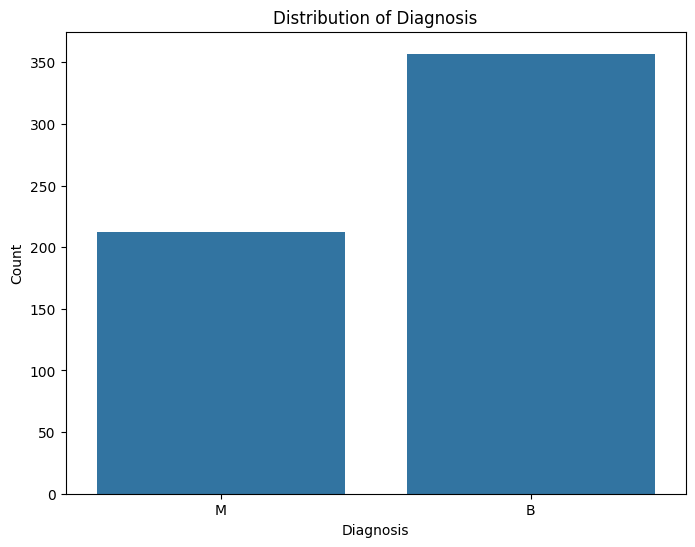

<ipython-input-3-d358df05b203>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


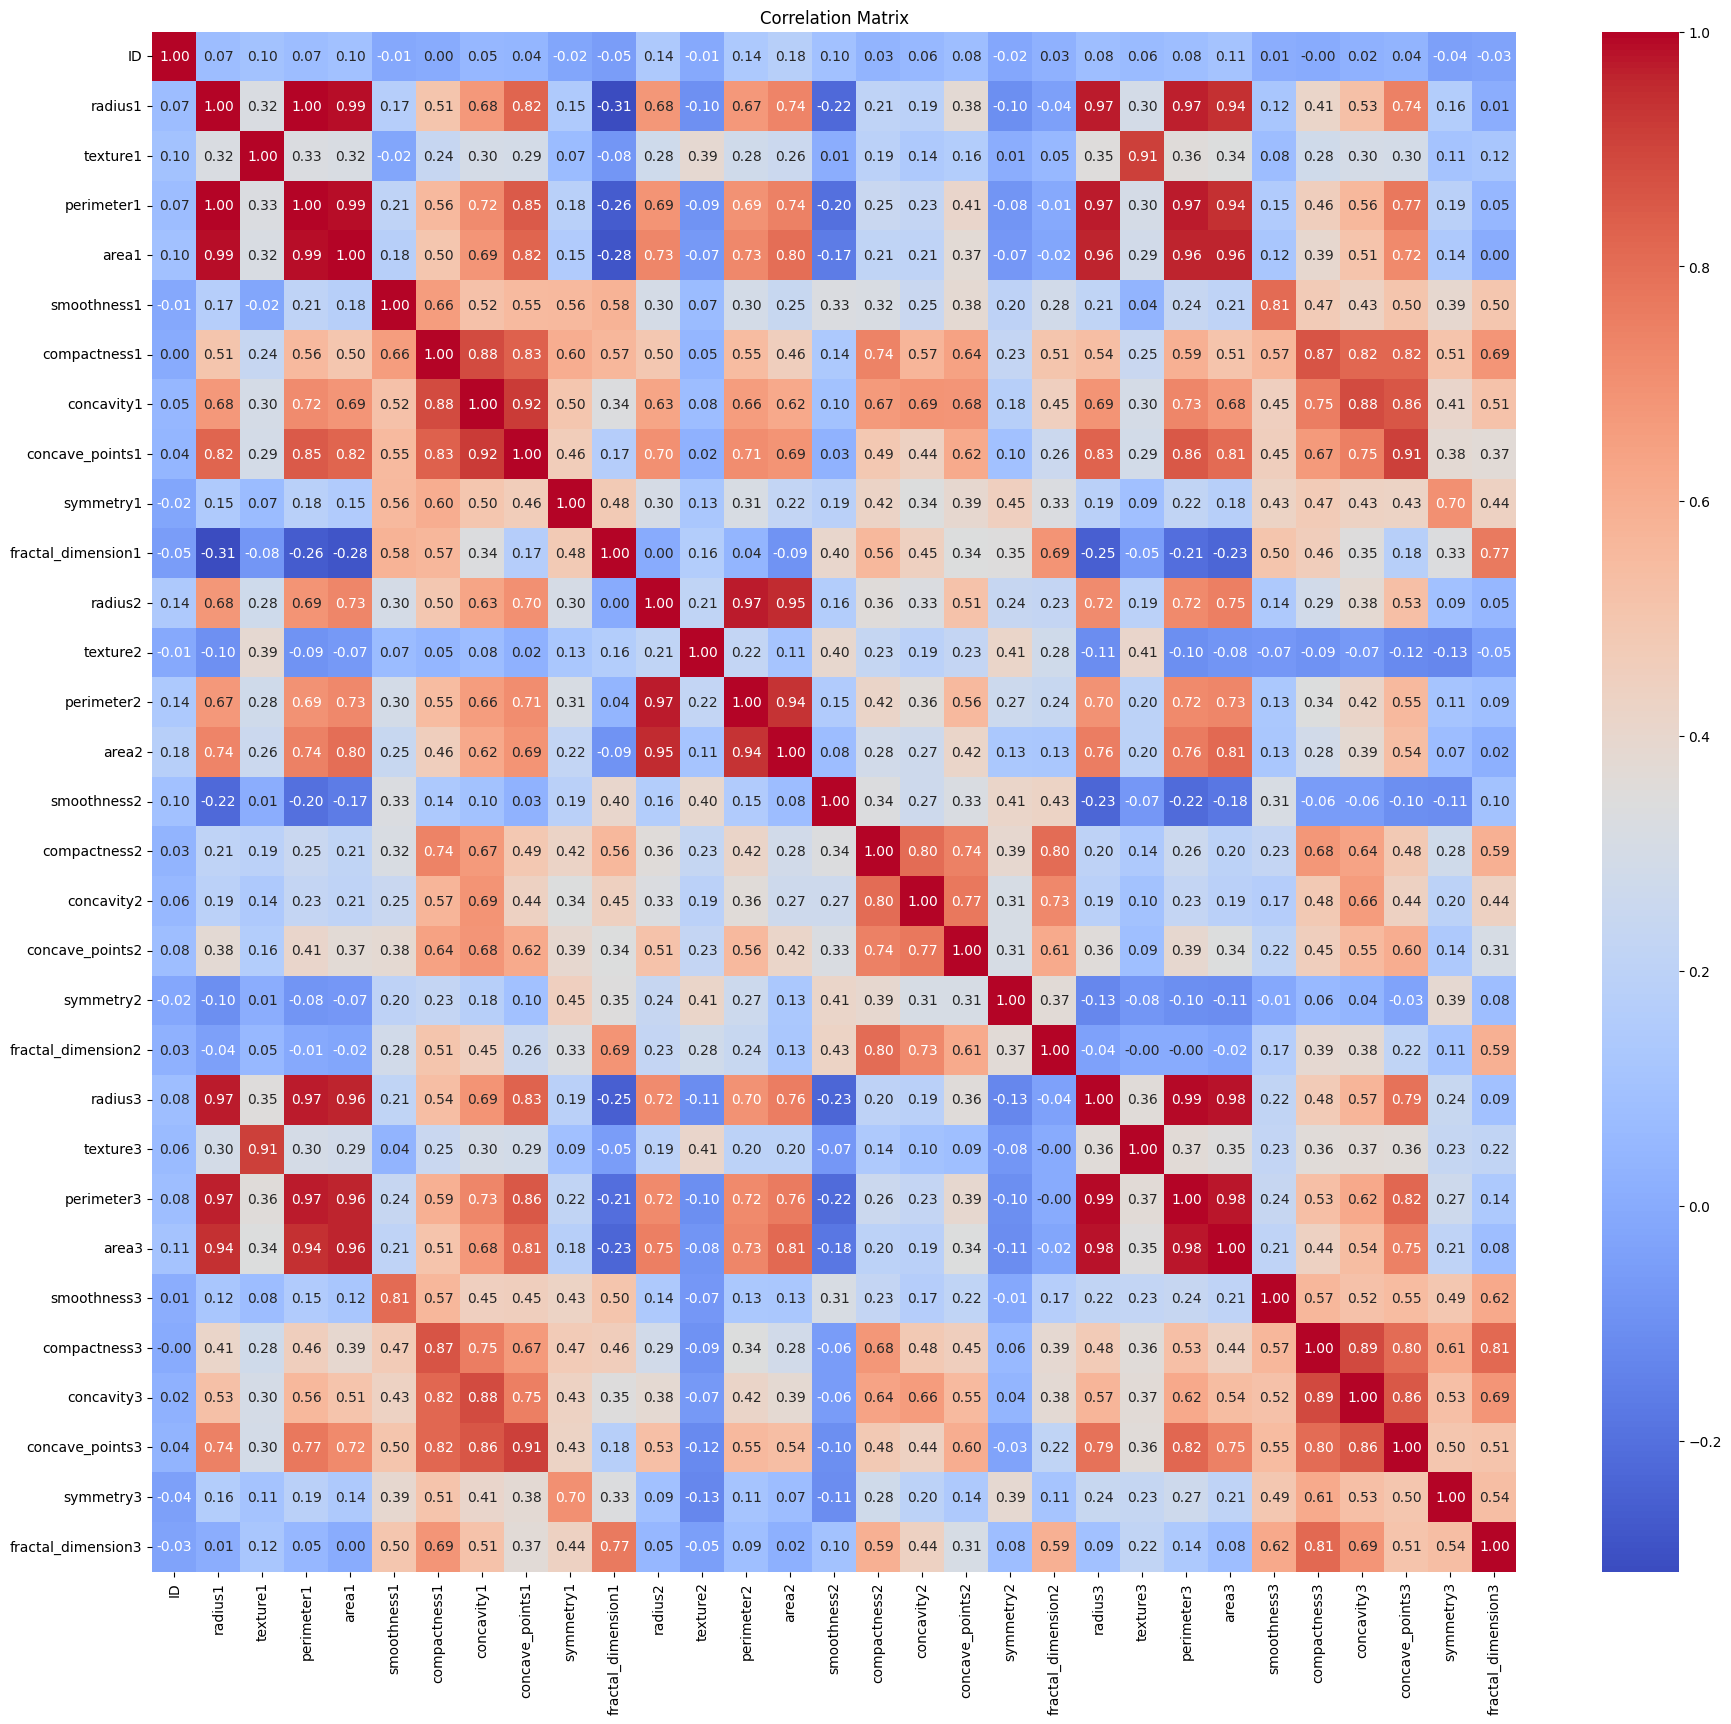

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_diagnostic.data.original
data = df.copy()

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Visualize the distribution of diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(22, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

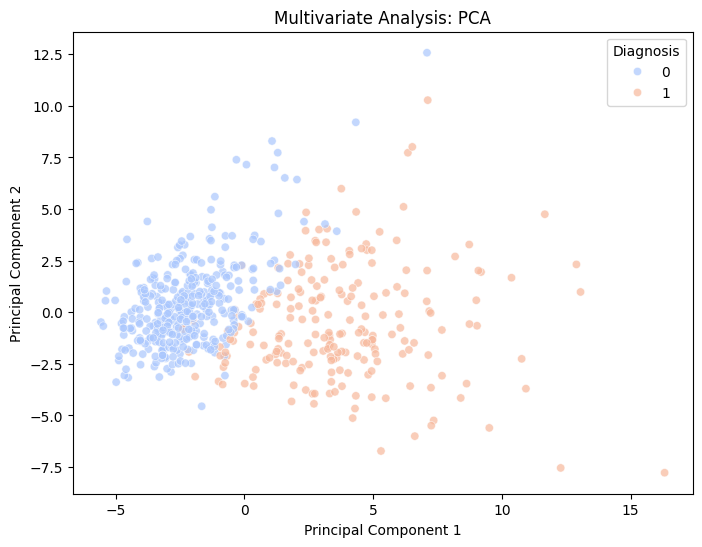

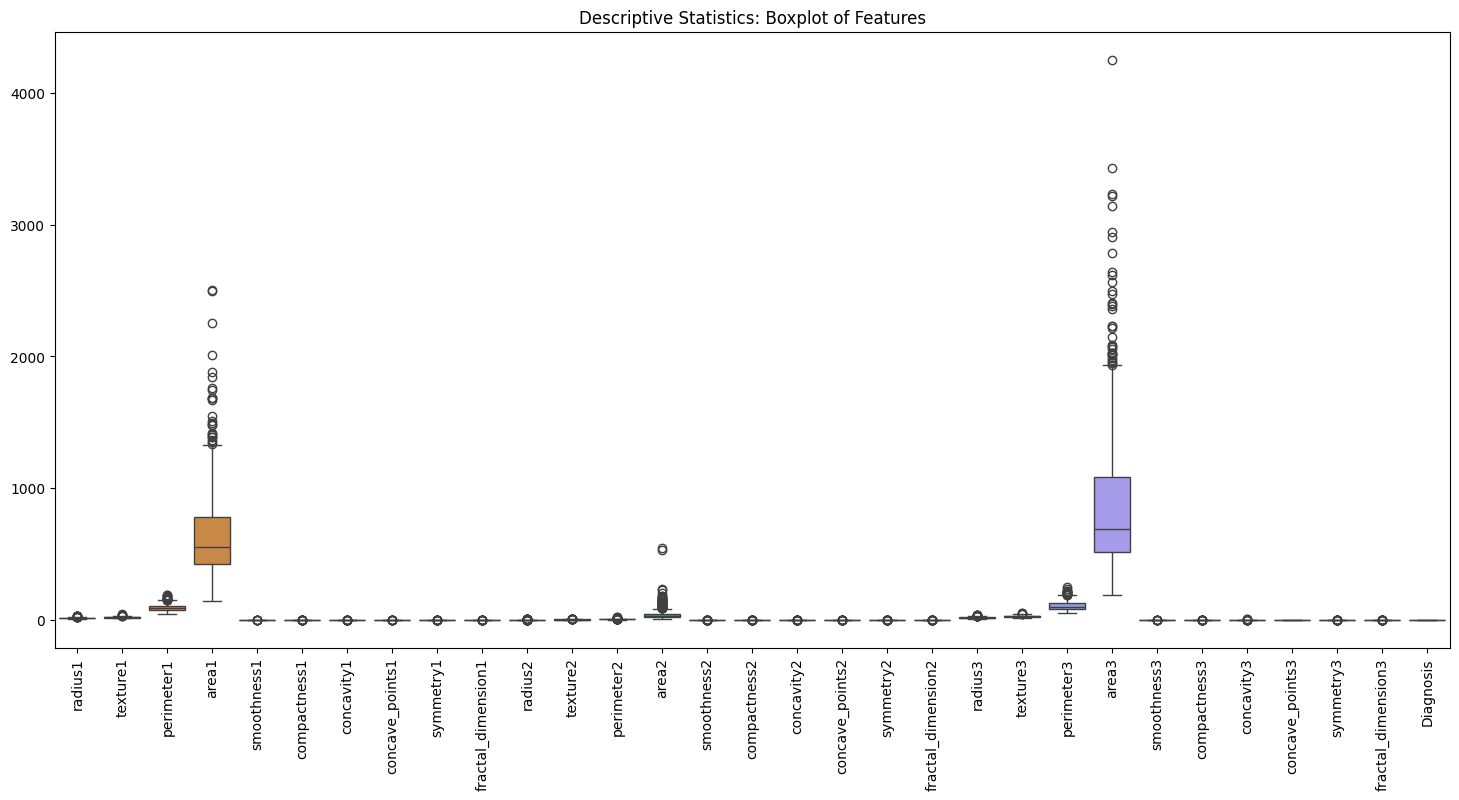

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop ID column (not useful for analysis)
data.drop('ID', axis=1, inplace=True)

# Convert Diagnosis (M/B) to binary labels (1/0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


# Multivariate Analysis: Principal Component Analysis (PCA)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('Multivariate Analysis: PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

# Descriptive Statistics Visualization
plt.figure(figsize=(18, 8))
sns.boxplot(data=data)
plt.title('Descriptive Statistics: Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
ROC AUC Score: 0.9697019325253848
Confusion Matrix:
[[70  1]
 [ 2 41]]


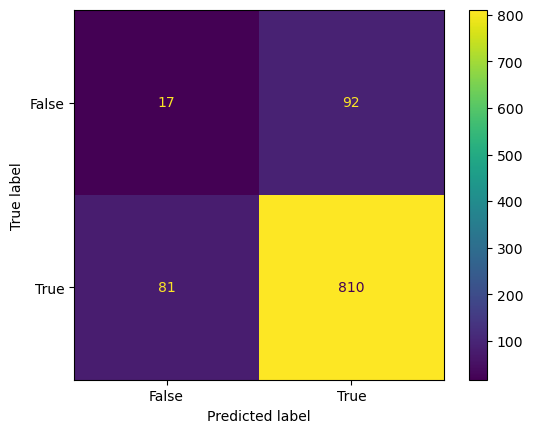

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Load data (as pandas DataFrame)
df = breast_cancer_wisconsin_diagnostic.data.original
data = df.copy()
# Extract features and target variable
X = data.drop(columns=["ID", "Diagnosis"])  # Exclude non-feature columns
y = data["Diagnosis"]

# Encode target variable (M and B) to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

#Visualize confusion matrix
actual = numpy.random.binomial(1,.9, size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()